# Airbnb Prices in European Cities

**We will build a machine learning model to predict the prices of Airbnb listings**

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import os

import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [2]:
# Installing opendatasets library to download the dataset
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as od

In [4]:
# Path to the dataset on kaggle website
dataset = r"https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities"

In [5]:
# Downloading the dataset
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nipungupta26
Your Kaggle Key: ··········


100%|██████████| 3.91M/3.91M [00:00<00:00, 85.6MB/s]

In [6]:
# Directory of the downloaded datasets in local system
data_dir = r'/content/airbnb-prices-in-european-cities'

In [7]:
# Listing out the datasets
os.listdir(data_dir)

['athens_weekdays.csv',
 'budapest_weekdays.csv',
 'rome_weekdays.csv',
 'vienna_weekends.csv',
 'athens_weekends.csv',
 'london_weekdays.csv',
 'lisbon_weekdays.csv',
 'berlin_weekends.csv',
 'rome_weekends.csv',
 'paris_weekdays.csv',
 'lisbon_weekends.csv',
 'berlin_weekdays.csv',
 'barcelona_weekends.csv',
 'barcelona_weekdays.csv',
 'paris_weekends.csv',
 'amsterdam_weekends.csv',
 'amsterdam_weekdays.csv',
 'budapest_weekends.csv',
 'london_weekends.csv',
 'vienna_weekdays.csv']

Importing **Path** object from **pathlib**

In [8]:
from pathlib import Path

Creating **Path** object

In [9]:
path = Path(data_dir)

Accessing **weekdays** csv file for respective cities using **glob** function of **Path**

In [10]:
i = 0
for file in path.glob('*days.csv'):
  if i == 0:
    df_weekday = pd.read_csv(file, index_col='Unnamed: 0')
    df_weekday['city'] = str(file)[42:-13]
    df_weekday['day'] = 'weekday'
  else:
    df_weekday_1 = pd.read_csv(file, index_col='Unnamed: 0')
    df_weekday_1['city'] = str(file)[42:-13]
    df_weekday_1['day'] = 'weekday'
    df_weekday = pd.concat([df_weekday, df_weekday_1])
  
  i = i + 1  

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df_weekday.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day
0,129.824479,Entire home/apt,False,False,4.0,False,0,0,10.0,100.0,2,2.813964,0.881890,55.348572,2.086871,78.778377,5.915160,23.76600,37.98300,athens,weekday
1,138.963748,Entire home/apt,False,False,4.0,True,1,0,10.0,96.0,1,0.407293,0.304568,240.306654,9.060559,407.167696,30.572629,23.73168,37.97776,athens,weekday
2,156.304923,Entire home/apt,False,False,3.0,True,0,1,10.0,98.0,1,1.237211,0.288488,199.507366,7.522257,395.967403,29.731642,23.72200,37.97900,athens,weekday
3,91.627024,Entire home/apt,False,False,4.0,True,1,0,10.0,99.0,1,4.367457,0.297467,39.803047,1.500740,58.706578,4.408047,23.72712,38.01435,athens,weekday
4,74.051508,Private room,False,True,2.0,False,0,0,10.0,100.0,1,2.194185,0.385266,78.733405,2.968577,113.325973,8.509204,23.73391,37.99529,athens,weekday


In [13]:
df_weekday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25500 entries, 0 to 1737
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     25500 non-null  float64
 1   room_type                   25500 non-null  object 
 2   room_shared                 25500 non-null  bool   
 3   room_private                25500 non-null  bool   
 4   person_capacity             25500 non-null  float64
 5   host_is_superhost           25500 non-null  bool   
 6   multi                       25500 non-null  int64  
 7   biz                         25500 non-null  int64  
 8   cleanliness_rating          25500 non-null  float64
 9   guest_satisfaction_overall  25500 non-null  float64
 10  bedrooms                    25500 non-null  int64  
 11  dist                        25500 non-null  float64
 12  metro_dist                  25500 non-null  float64
 13  attr_index                  2550

Accessing **weekends** csv file for respective cities using **glob** function of **Path**

In [14]:
i = 0
for file in path.glob('*ends.csv'):
  if i == 0:
    df_weekend = pd.read_csv(file, index_col='Unnamed: 0')
    df_weekend['city'] = str(file)[42:-13]
    df_weekend['day'] = 'weekend'
  else:
    df_weekend_1 = pd.read_csv(file, index_col='Unnamed: 0')
    df_weekend_1['city'] = str(file)[42:-13]
    df_weekend_1['day'] = 'weekend'
    df_weekend = pd.concat([df_weekend, df_weekend_1])
  
  i = i + 1  

In [15]:
i = None

In [16]:
df_weekend.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day
0,324.661665,Entire home/apt,False,False,4.0,True,0,1,10.0,94.0,2,3.240613,0.610450,92.473467,6.622340,129.862880,3.138736,16.33006,48.20921,vienna,weekend
1,150.760816,Entire home/apt,False,False,2.0,True,0,1,10.0,96.0,1,2.241126,1.119505,124.258002,8.898538,154.350322,3.730588,16.38867,48.19104,vienna,weekend
2,196.339668,Entire home/apt,False,False,3.0,True,0,1,9.0,91.0,1,2.371551,0.452419,125.413127,8.981261,206.642494,4.994469,16.34236,48.20436,vienna,weekend
3,107.753079,Private room,False,True,2.0,False,0,0,8.0,92.0,1,3.629114,0.473164,62.459416,4.472931,93.810714,2.267369,16.37837,48.24102,vienna,weekend
4,196.339668,Entire home/apt,False,False,4.0,True,0,1,9.0,94.0,1,2.395063,0.443635,124.020359,8.881520,202.318070,4.889950,16.34198,48.20456,vienna,weekend


In [17]:
df_weekend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26207 entries, 0 to 5378
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     26207 non-null  float64
 1   room_type                   26207 non-null  object 
 2   room_shared                 26207 non-null  bool   
 3   room_private                26207 non-null  bool   
 4   person_capacity             26207 non-null  float64
 5   host_is_superhost           26207 non-null  bool   
 6   multi                       26207 non-null  int64  
 7   biz                         26207 non-null  int64  
 8   cleanliness_rating          26207 non-null  float64
 9   guest_satisfaction_overall  26207 non-null  float64
 10  bedrooms                    26207 non-null  int64  
 11  dist                        26207 non-null  float64
 12  metro_dist                  26207 non-null  float64
 13  attr_index                  2620

Concatenating the **weekday** and **weekend** dataframes

In [18]:
df = pd.concat([df_weekday, df_weekend])

In [19]:
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day
0,129.824479,Entire home/apt,False,False,4.0,False,0,0,10.0,100.0,2,2.813964,0.881890,55.348572,2.086871,78.778377,5.915160,23.76600,37.98300,athens,weekday
1,138.963748,Entire home/apt,False,False,4.0,True,1,0,10.0,96.0,1,0.407293,0.304568,240.306654,9.060559,407.167696,30.572629,23.73168,37.97776,athens,weekday
2,156.304923,Entire home/apt,False,False,3.0,True,0,1,10.0,98.0,1,1.237211,0.288488,199.507366,7.522257,395.967403,29.731642,23.72200,37.97900,athens,weekday
3,91.627024,Entire home/apt,False,False,4.0,True,1,0,10.0,99.0,1,4.367457,0.297467,39.803047,1.500740,58.706578,4.408047,23.72712,38.01435,athens,weekday
4,74.051508,Private room,False,True,2.0,False,0,0,10.0,100.0,1,2.194185,0.385266,78.733405,2.968577,113.325973,8.509204,23.73391,37.99529,athens,weekday


Information about the dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51707 entries, 0 to 5378
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  5170

The dataset contains **51707** rows and **21** columns. Also, there are no missing values

Description about numerical features

In [21]:
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


Description about categorical features

In [22]:
df.describe(include=['O'])

,room_type,city,day
count,51707,51707,51707
unique,3,10,2
top,Entire home/apt,london,weekend
freq,32648,9993,26207


# Data Leakage

During the training phase, the ML model should know only about the training data. But if the model gets to know about the test data during the training phase, then this is called data leakage.

So we should perform splitting of the dataset before applying feature engineering. After splitting, we will first apply feature engineering for the training data and then apply it on to the test data. This will help to reduce data leakage and overfitting.

But presence of duplicates can also cause data leakage. Therefore, we will first remove the duplicate records from the dataset and then perform train test split

In [23]:
df.iloc[:,1:].duplicated().sum()

0

There are no duplicate values in the data

#### Splitting the dataset into training and testing datasets

In [24]:
X = df.drop(columns=["realSum"], axis=1)
Y = df.realSum

In [25]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, shuffle=True)

Resetting the indices for the training dataframes

In [26]:
X_train.reset_index(inplace = True, drop = True)

In [27]:
y_train.reset_index(inplace = True, drop = True)

Joining the training dataframe

In [28]:
df_train = X_train.join(y_train, how='inner')

Resetting the indices for the testing dataframes

In [29]:
X_test.reset_index(inplace = True, drop = True)

In [30]:
y_test.reset_index(inplace = True, drop = True)

Joining the testing dataframe

In [31]:
df_test = X_test.join(y_test, how='inner')

## Data Preprocessing and cleaning in the training dataframe

In [32]:
df_train.nunique()

room_type                         3
room_shared                       2
room_private                      2
person_capacity                   5
host_is_superhost                 2
multi                             2
biz                               2
cleanliness_rating                9
guest_satisfaction_overall       52
bedrooms                         10
dist                          36194
metro_dist                    36194
attr_index                    36194
attr_index_norm               36180
rest_index                    36194
rest_index_norm               36179
lng                           20163
lat                           18560
city                             10
day                               2
realSum                        9122
dtype: int64

In [33]:
df_train.shape

(36194, 21)

In [34]:
continuous_features = [feature for feature in df_train.select_dtypes(np.number).columns if feature not in ['realSum', 'person_capacity', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms']]

In [35]:
continuous_features

['dist',
 'metro_dist',
 'attr_index',
 'attr_index_norm',
 'rest_index',
 'rest_index_norm',
 'lng',
 'lat']

In [36]:
import scipy.stats as stat
import pylab

In [37]:
def create_boxplots(dataset, feature_list):
    for feature in feature_list:
      plt.figure(figsize=(5,5))
      plt.ticklabel_format(style='plain')
      plt.suptitle("Boxplot and Q-Q plot of " + feature, fontweight="bold", fontsize=15)
      #dataset.boxplot(column=feature)
      plt.subplot(2,3,1)
      sns.boxplot(y=feature, data=dataset, color='orange')
      #plt.ylabel(feature)
      #plt.title(feature)
      plt.subplot(2,3,3)
      stat.probplot(dataset[feature], dist='norm', plot=pylab)
      plt.show()

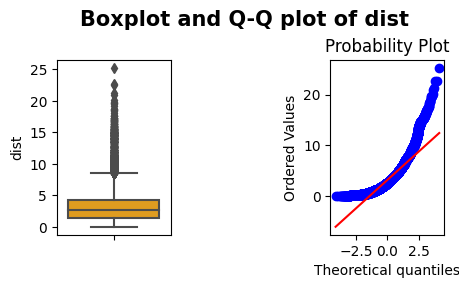

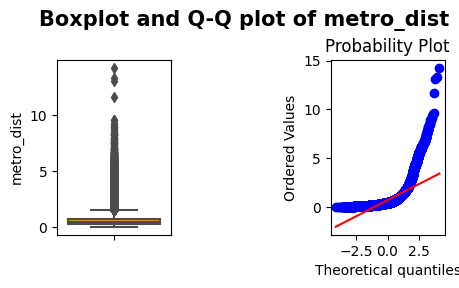

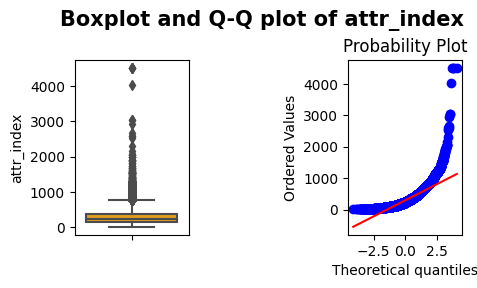

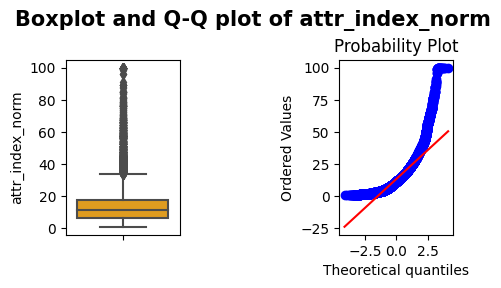

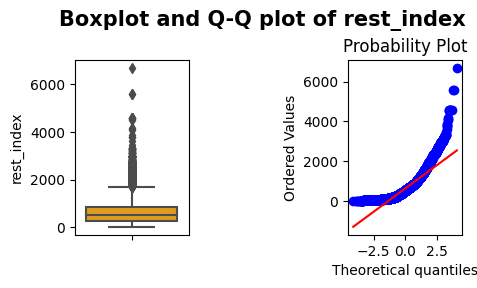

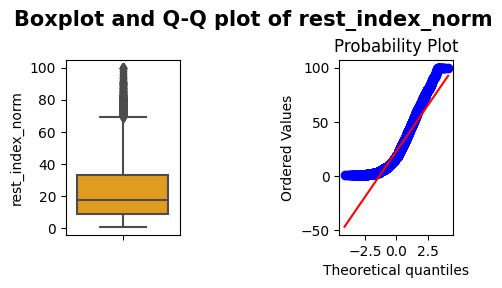

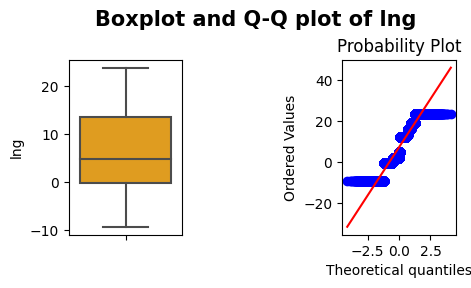

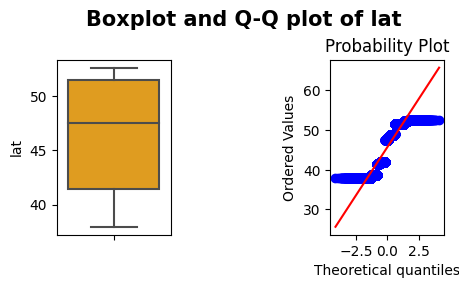

In [38]:
create_boxplots(df_train, continuous_features)

In [39]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
        lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
        #print(feature, lower_bridge)
        upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
        #print(feature, upper_bridge)
        if lower_bridge != upper_bridge:
          dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
          dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge
        else:
          lower_bridge = dataset[feature].quantile(0.25)/2
          upper_bridge = dataset[feature].quantile(0.75) * 2
          dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
          dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

In [40]:
remove_outliers(df_train, continuous_features)

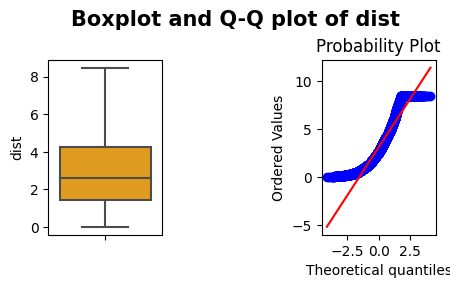

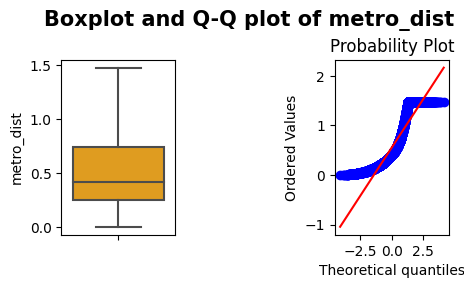

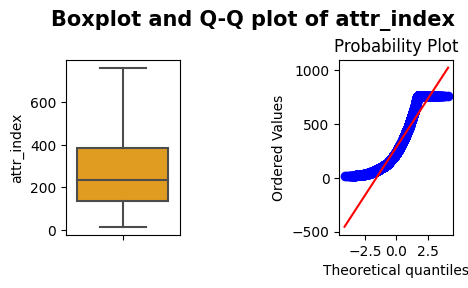

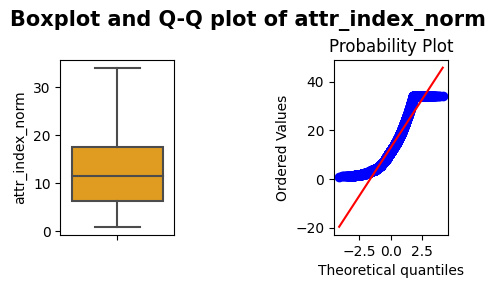

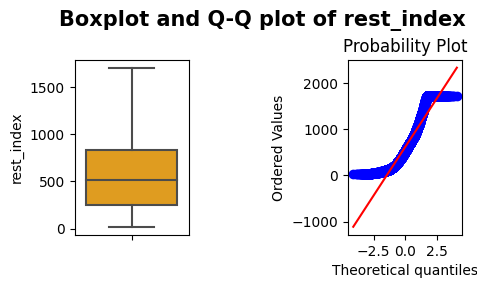

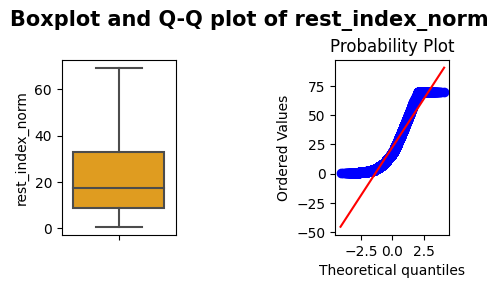

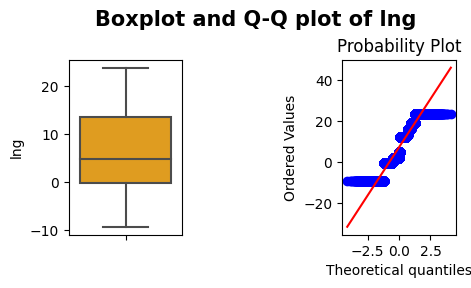

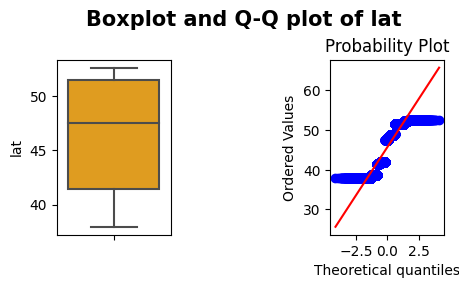

In [41]:
create_boxplots(df_train, continuous_features)

In [42]:
def create_histograms_distplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(10,10))
        plt.suptitle("Histogram and Q-Q plot of variable " + feature, fontweight="bold", fontsize=15)
        plt.subplot(3,5,1)
        plt.ticklabel_format(style='plain')
        #plt.hist(dataset[feature].dropna())
        sns.histplot(x = dataset[feature].dropna(), kde = True)
        plt.title(feature)
        plt.subplot(3,5,3)
        plt.ticklabel_format(style='plain')
        sns.distplot(dataset[feature])
        plt.ylabel('Count/Frequency')
        plt.subplot(3,5,5)
        stat.probplot(dataset[feature], dist='norm', plot=pylab)
        plt.show()

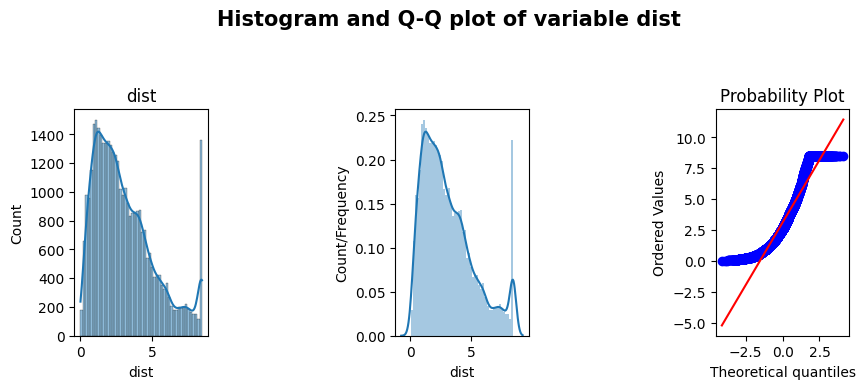

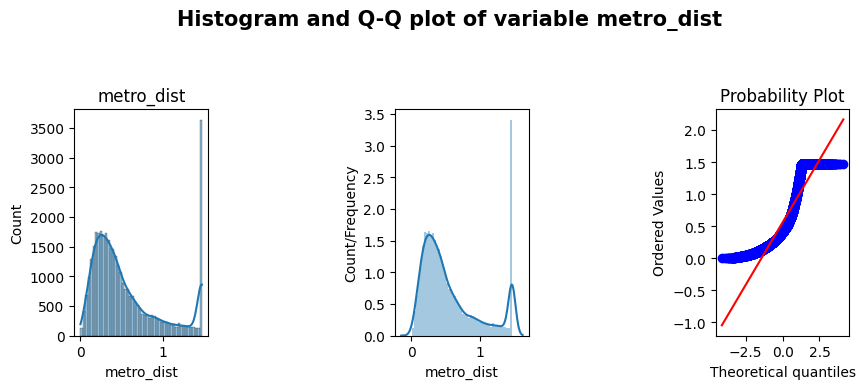

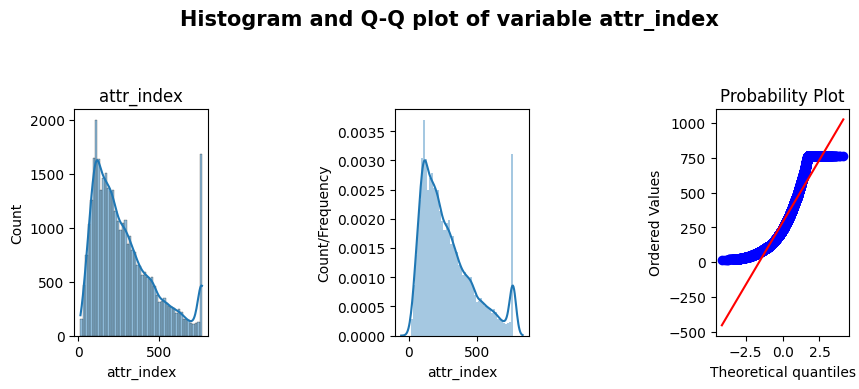

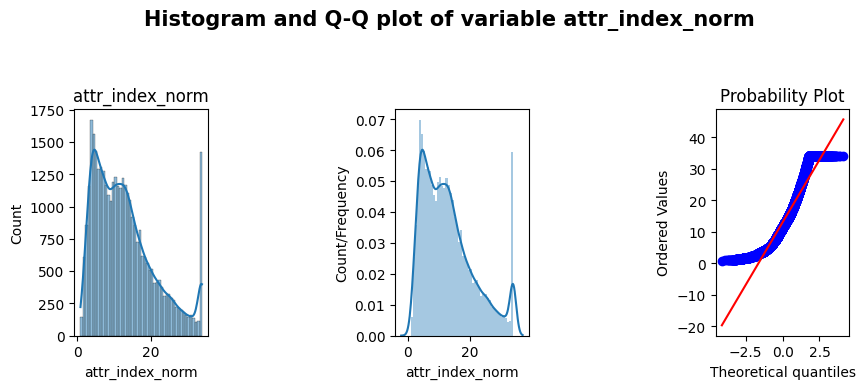

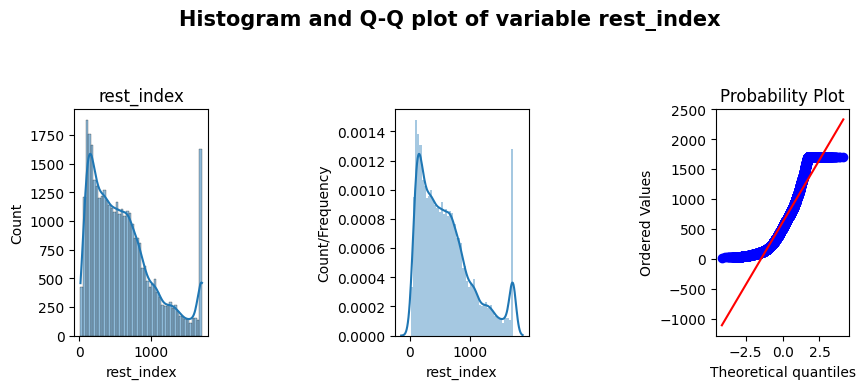

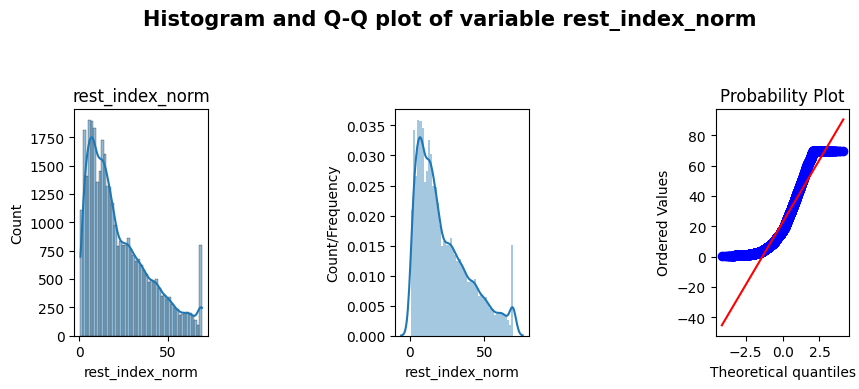

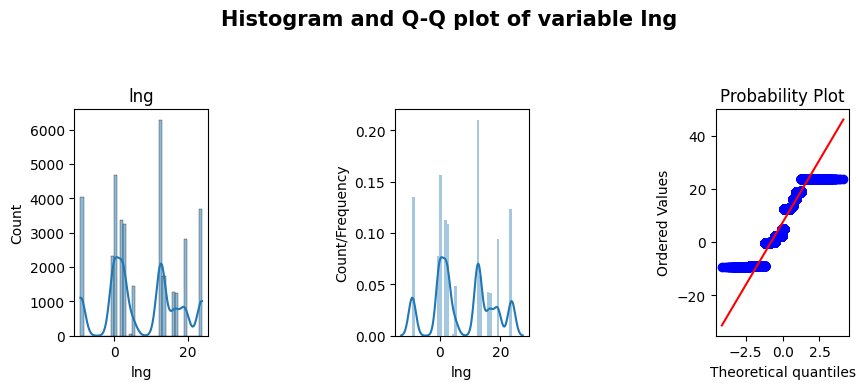

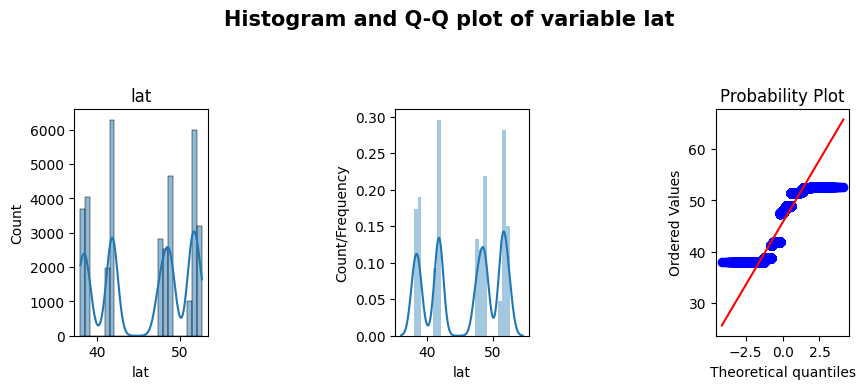

In [43]:
create_histograms_distplots(df_train, continuous_features)

In [44]:
from scipy.stats import skew

In [45]:
def skewness_score(dataset, feature_list):
    variables = []
    skew_scores = []
    square_root_transformed_skew_scores = []
    log_transformed_skew_scores = []
    #exp_transformed_skew_scores = []
    #boxcox_transformed_skew_scores = []
    for feature in feature_list:
      column_name_square_root = ''
      column_name_log = ''
      variables.append(feature)
      skew_scores.append(skew(dataset[feature]))
      #print(feature, skew(dataset[feature]))
      if (float(skew(dataset[feature])) >= 0.5) | (float(skew(dataset[feature])) <= -0.5): 
        if dataset[feature].min() > 0:
          #column_name_square_root = f'{str(feature)} square root transformed'
          #dataset[column_name_square_root] = np.sqrt(dataset[feature])
          dataset[feature] = np.sqrt(dataset[feature])
          #column_name_log = f'{str(feature)} log transformed'
          #dataset[column_name_log] = np.log(dataset[feature])
          #dataset[feature] = np.log(dataset[feature])
          #square_root_transformed_skew_scores.append(skew(dataset[column_name_square_root]))
          square_root_transformed_skew_scores.append(skew(dataset[feature]))
          #log_transformed_skew_scores.append(skew(dataset[column_name_log]))
          #log_transformed_skew_scores.append(skew(dataset[feature]))
        else:
          square_root_transformed_skew_scores.append('Not transformed')
          #log_transformed_skew_scores.append('Not transformed')
        #column_name_exp = f'{str(feature)} exp transformed'
        #dataset[feature] = np.exp(dataset[feature])
        #exp_transformed_skew_scores.append(skew(dataset[feature]))
        #boxcox_transformed_skew_scores.append(skew(dataset[column_name_exp]))
      else:
        #pass
        square_root_transformed_skew_scores.append('Not transformed')
        #log_transformed_skew_scores.append('Not transformed')
        #exp_transformed_skew_scores.append('Not transformed')
        #boxcox_transformed_skew_scores.append('Not transformed')
    #print(len(variables))
    #print(len(skew_scores))
    #print(len(square_root_transformed_skew_scores))
    #print(len(log_transformed_skew_scores))
    #print(skew_scores)
    #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores, 'Skewness score after boxcox transformation of skewed features': boxcox_transformed_skew_scores}
    #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores}
    #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores}
    #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores}
    skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores}
    skewness_score = pd.DataFrame(skew_dict)
    return skewness_score

In [46]:
skewness_score(df_train, continuous_features)

,Feature,Skewness Score before transformation,Skewness score after square root transformation of skewed features
0,dist,0.902650,0.224245
1,metro_dist,1.061968,0.540556
2,attr_index,0.984027,0.404101
3,attr_index_norm,0.881964,0.284654
4,rest_index,0.927809,0.255567
5,rest_index_norm,0.944909,0.283522
6,lng,0.033465,Not transformed
7,lat,-0.183922,Not transformed


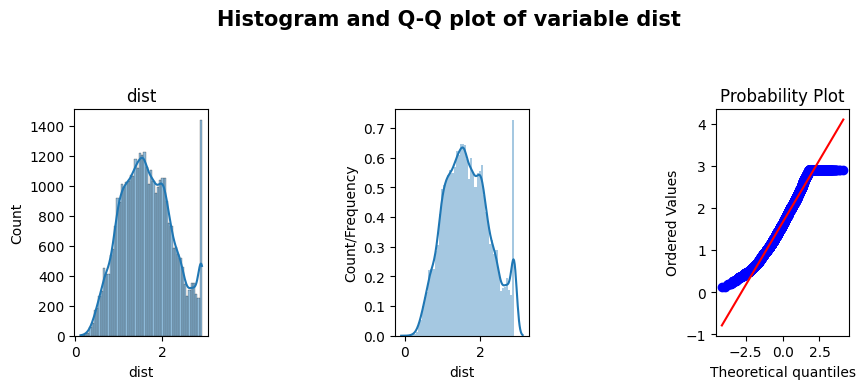

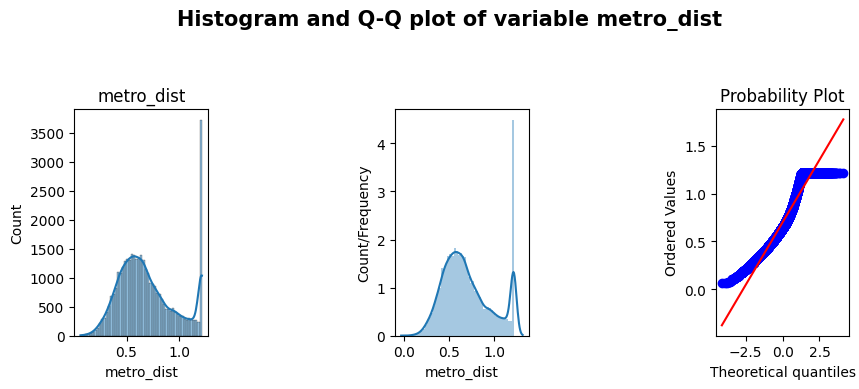

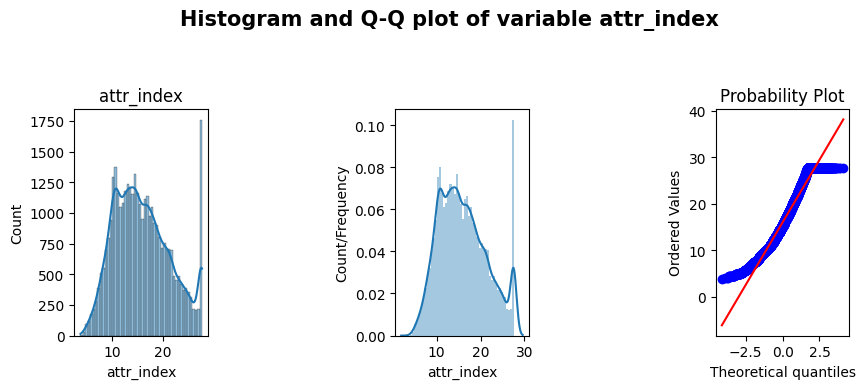

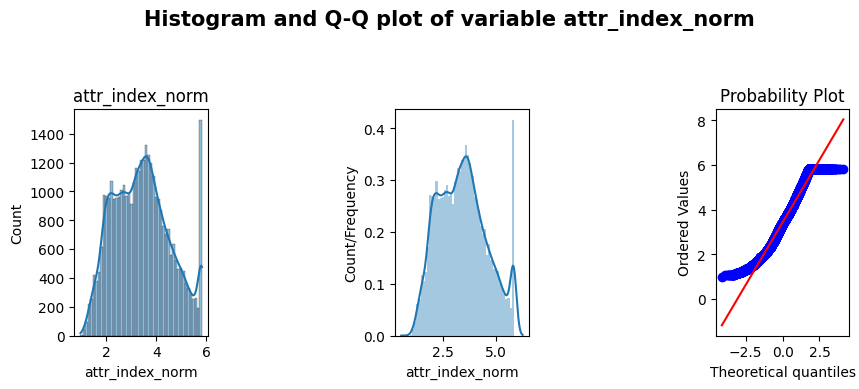

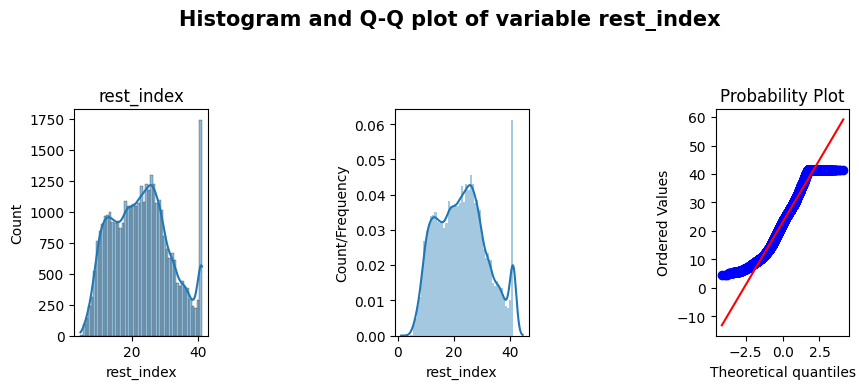

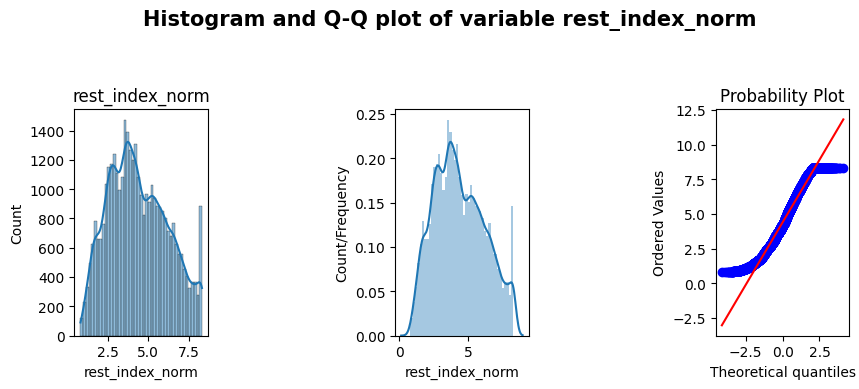

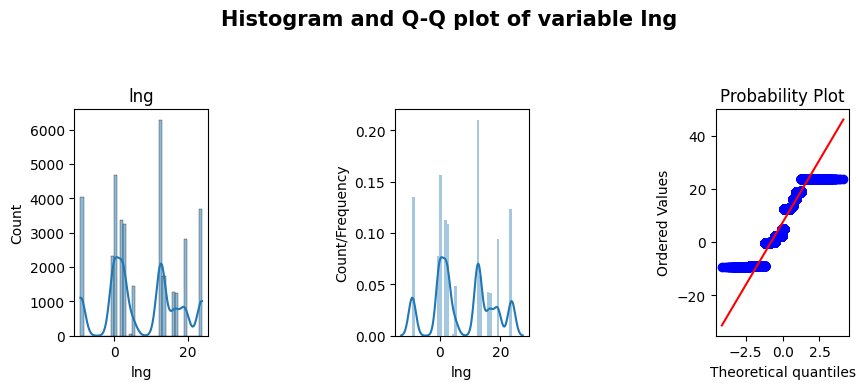

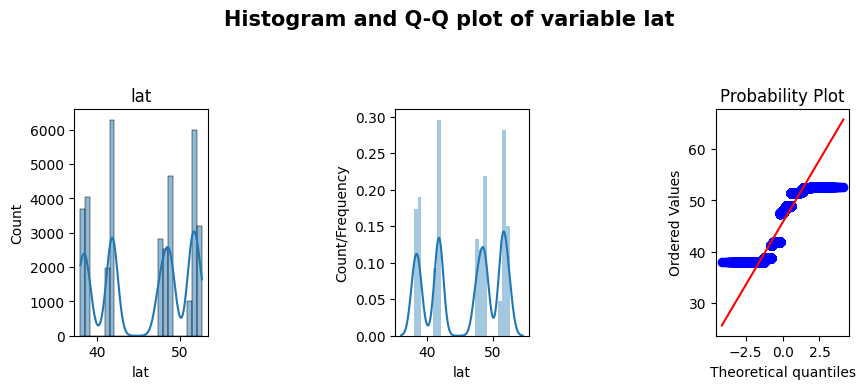

In [47]:
create_histograms_distplots(df_train, continuous_features)

In [48]:
def create_relplot(dataset, list_of_features, target):
    for feature in list_of_features:
        for bivariate_feature in list_of_features:
            if bivariate_feature != feature:
                plt.figure(figsize=(7,7))
                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue=target)
                plt.show()

<Figure size 700x700 with 0 Axes>

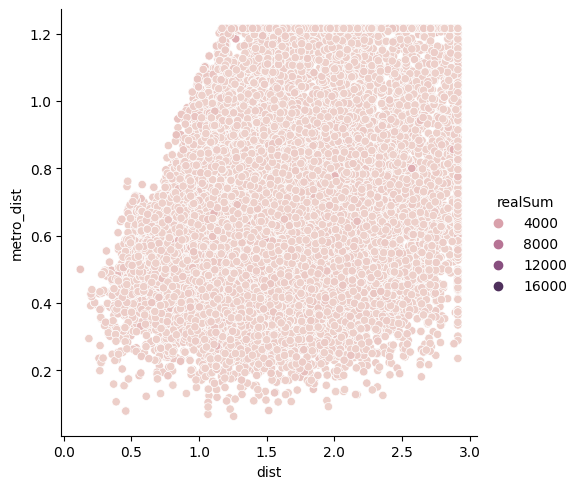

<Figure size 700x700 with 0 Axes>

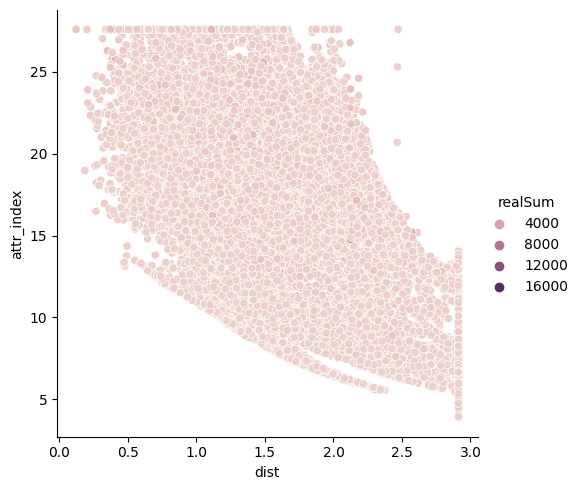

<Figure size 700x700 with 0 Axes>

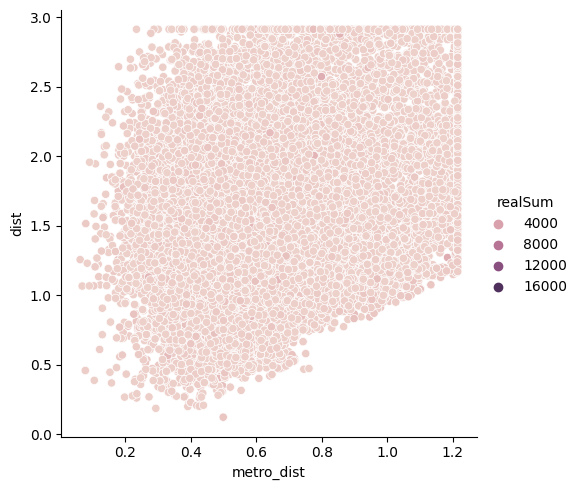

<Figure size 700x700 with 0 Axes>

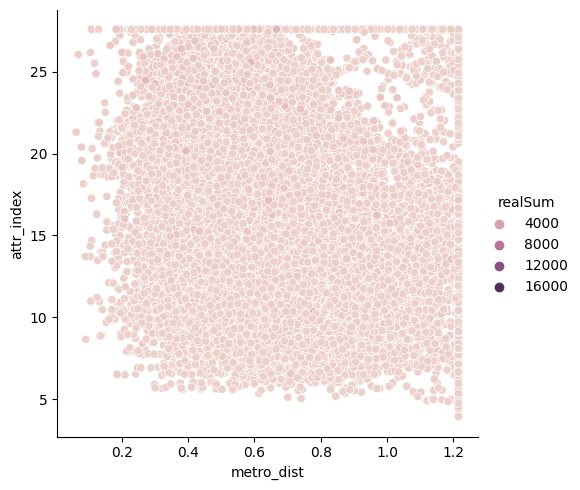

<Figure size 700x700 with 0 Axes>

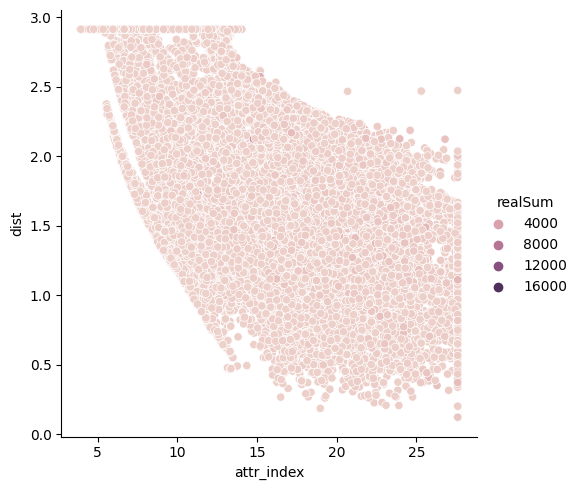

<Figure size 700x700 with 0 Axes>

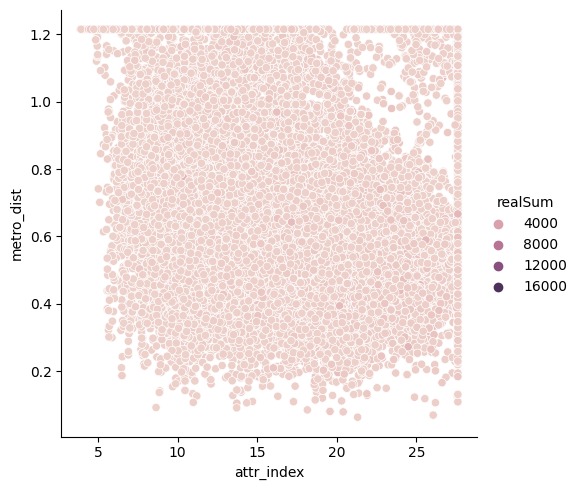

In [49]:
create_relplot(df_train, continuous_features[:3], 'realSum')

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36194 entries, 0 to 36193
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   room_type                   36194 non-null  object 
 1   room_shared                 36194 non-null  bool   
 2   room_private                36194 non-null  bool   
 3   person_capacity             36194 non-null  float64
 4   host_is_superhost           36194 non-null  bool   
 5   multi                       36194 non-null  int64  
 6   biz                         36194 non-null  int64  
 7   cleanliness_rating          36194 non-null  float64
 8   guest_satisfaction_overall  36194 non-null  float64
 9   bedrooms                    36194 non-null  int64  
 10  dist                        36194 non-null  float64
 11  metro_dist                  36194 non-null  float64
 12  attr_index                  36194 non-null  float64
 13  attr_index_norm             361